In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv(filepath_or_buffer ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")

In [6]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
df['peak-rpm'].dtype

dtype('float64')

In [8]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

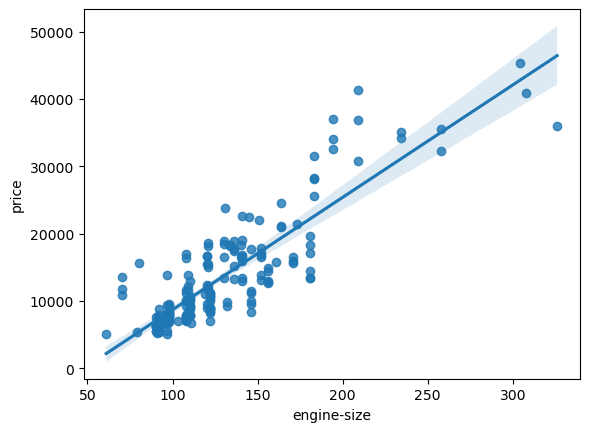

In [9]:
sns.regplot(x='engine-size',y='price',data=df)

In [10]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

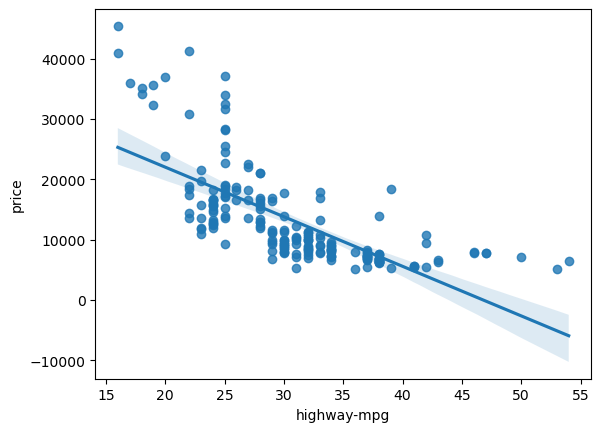

In [11]:
sns.regplot(x='highway-mpg',y='price',data=df)

In [12]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

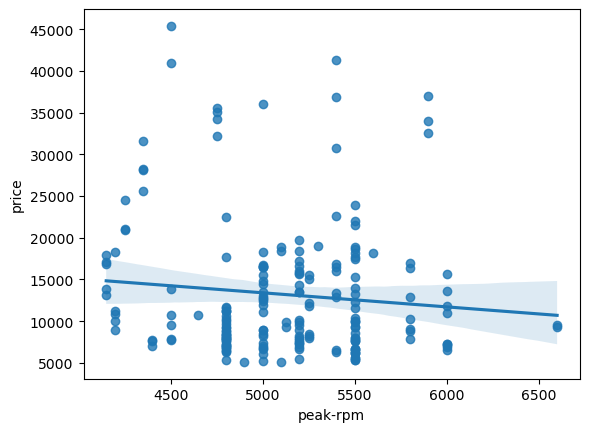

In [13]:
sns.regplot(x='peak-rpm',y='price',data=df)

In [14]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [15]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

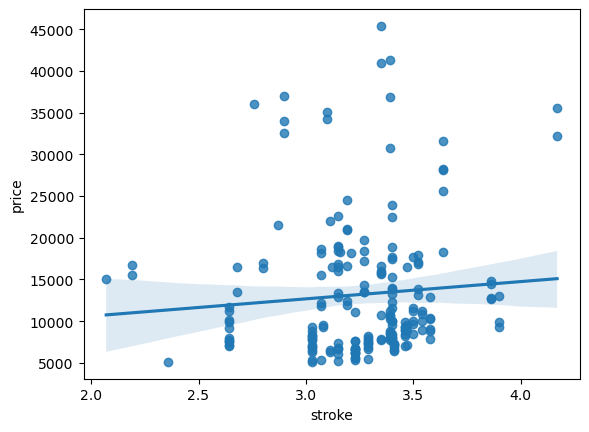

In [16]:
sns.regplot(x='stroke',y='price',data=df)

<Axes: xlabel='body-style', ylabel='price'>

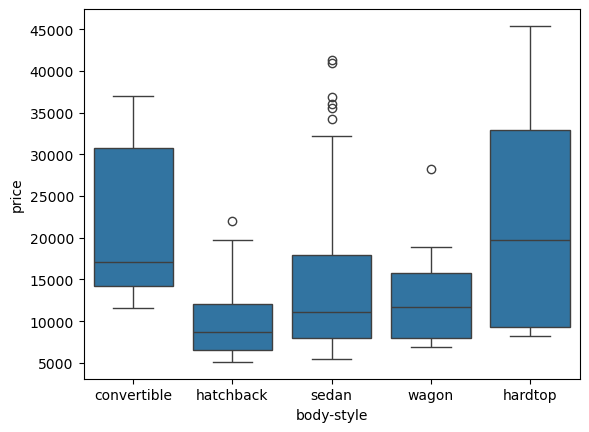

In [17]:
sns.boxplot(x='body-style',y='price',data=df)

<Axes: xlabel='engine-location', ylabel='price'>

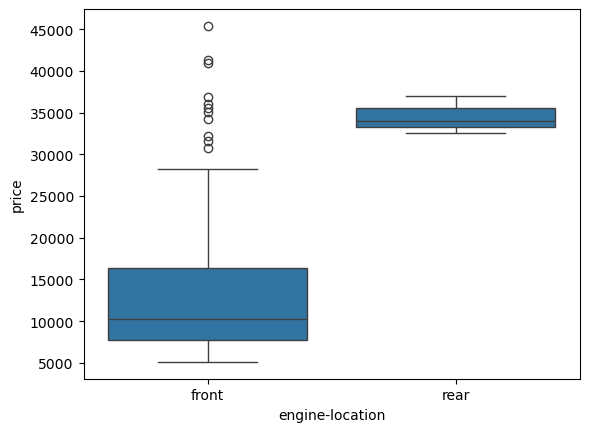

In [18]:
sns.boxplot(x='engine-location',y='price',data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

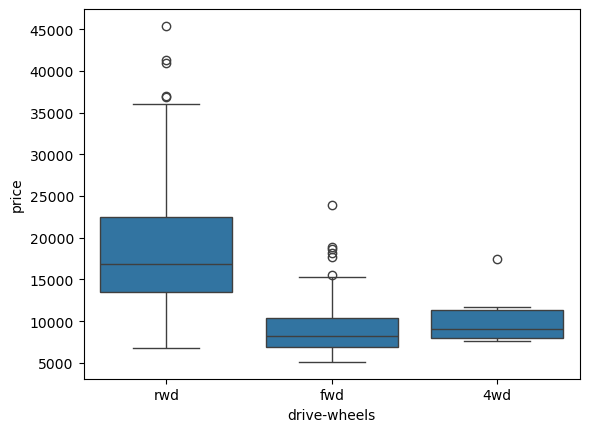

In [19]:
sns.boxplot(x='drive-wheels',y='price',data=df)

In [20]:
df.describe()
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [21]:
df_wheel_counts =df['drive-wheels'].value_counts().to_frame()

In [22]:
df_wheel_counts.rename(columns={'drive-wheels':'value_counts'},inplace= True)
df_wheel_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [23]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [24]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [25]:
df_grp1 = df[['drive-wheels','body-style','price']]

In [26]:
mapping = {'fwd': 1, 'rwd': 2, '4wd': 3}
df['drive-wheels'] = df['drive-wheels'].map(mapping)
df['drive-wheels']= df['drive-wheels'].astype('float')


In [27]:
df_test1= df_grp1.groupby(['drive-wheels','body-style'],as_index = False).mean()
df_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [28]:
df_pivot= df_test1.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [29]:
df_pivot= df_pivot.fillna(0)
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [30]:
df_grp2 = df[['body-style','price']]

In [31]:
df_test2 = df_grp2.groupby(['body-style'],as_index= False).mean()
df_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


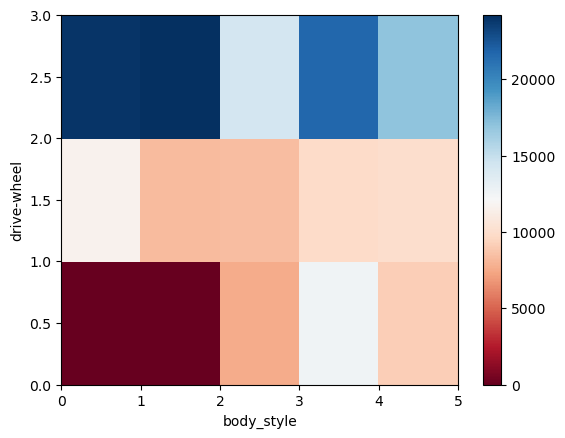

In [32]:
plt.ylabel('drive-wheel')
plt.xlabel('body_style')
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()


In [33]:
pearson_coef,p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732552e-20


In [34]:
pearson_coef,p_value = stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is 0.8095745670036555  with a P-value of 6.369057428260919e-48


In [35]:
pearson_coef,p_value = stats.pearsonr(df['length'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of 8.016477466158383e-30


In [36]:
pearson_coef,p_value = stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is 0.7512653440522665  with a P-value of 9.200335510484122e-38


In [37]:
pearson_coef,p_value = stats.pearsonr(df['curb-weight'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is 0.8344145257702849  with a P-value of 2.189577238893391e-53


In [38]:
pearson_coef,p_value = stats.pearsonr(df['engine-size'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of 9.265491622198793e-64


In [39]:
pearson_coef,p_value = stats.pearsonr(df['bore'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is 0.5431553832626604  with a P-value of 8.049189483935315e-17


In [40]:
pearson_coef,p_value = stats.pearsonr(df['city-mpg'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is -0.6865710067844681  with a P-value of 2.3211320655673725e-29


In [41]:
pearson_coef,p_value = stats.pearsonr(df['highway-mpg'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef," with a P-value of",p_value)

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of 1.7495471144474792e-31


In [42]:
lm = LinearRegression()

In [43]:
X = df[['highway-mpg']]
Y = df[['price']]

In [44]:
lm.fit(X,Y)

LinearRegression()

In [45]:
yhat = lm.predict(X)
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [46]:
a=lm.intercept_


In [47]:
b=lm.coef_

In [48]:
yhat = a+b*X

In [49]:
yhat

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504643


In [50]:
X['highway-mpg'].head()

0    27
1    27
2    26
3    30
4    22
Name: highway-mpg, dtype: int64

In [51]:
Y['price'].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [52]:
lm1 = LinearRegression()

In [53]:
X1 = df[['engine-size']]
Y1 = df[['price']]

In [54]:
lm1.fit(X1,Y1)

LinearRegression()

In [55]:
lm1.intercept_

array([-7963.33890628])

In [57]:
lm1.coef_

array([[166.86001569]])

In [58]:
yhat1 =lm1.predict(X1)
yhat1[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [59]:
Yhat = -7963.34 + 166.86*X1
price = Yhat


In [60]:
price

,engine-size
0,13728.46
1,13728.46
2,17399.38
3,10224.40
4,14729.62
...,...
196,15563.92
197,15563.92
198,20903.44
199,16231.36


In [61]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [62]:
lm.fit(Z,df[['price']])

LinearRegression()

In [63]:
lm.intercept_


array([-15806.62462633])

In [64]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [65]:
yhat = -15806.62 + 53.49*df['horsepower'] + 4.71*df['curb-weight'] + 81.53*df['engine-size'] + 36.06*df['highway-mpg']
price2 = yhat
price2

0      13704.37
1      13704.37
2      19057.29
3      10625.20
4      15527.17
         ...   
196    16700.57
197    19509.80
198    20481.63
199    17810.86
200    17110.49
Length: 201, dtype: float64

In [66]:
lm3 = LinearRegression()

In [67]:
W = df[['normalized-losses','highway-mpg']]

In [68]:
lm3.fit(W,df[['price']])

LinearRegression()

In [69]:
lm3.coef_

array([[   1.49789586, -820.45434016]])

In [70]:
lm3.intercept_

array([38201.31327246])

In [71]:
yhat3 = lm3.predict(W)
yhat3[0:5]

array([[16231.78938339],
       [16231.78938339],
       [17052.24372355],
       [13833.33798916],
       [20396.97271047]])

(0.0, 48170.84245644363)

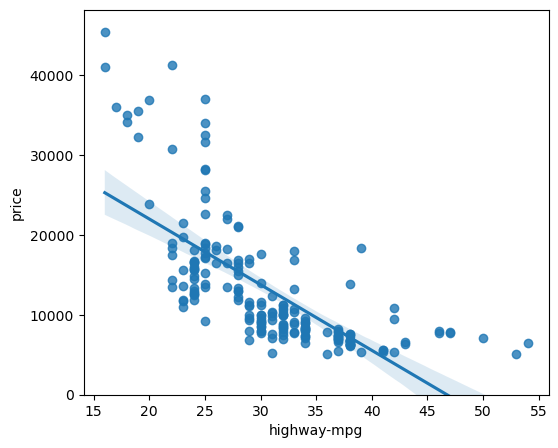

In [72]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

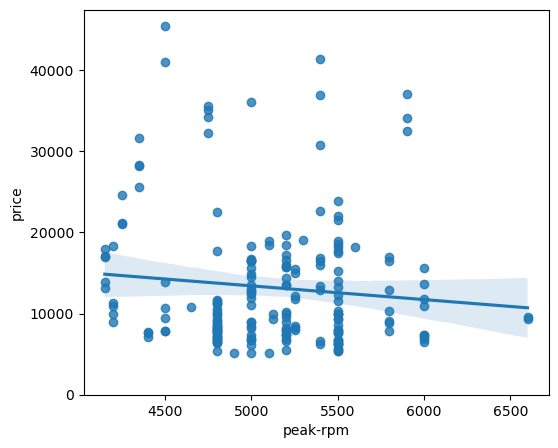

In [73]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [74]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


(0.0, 22450.66845817666)

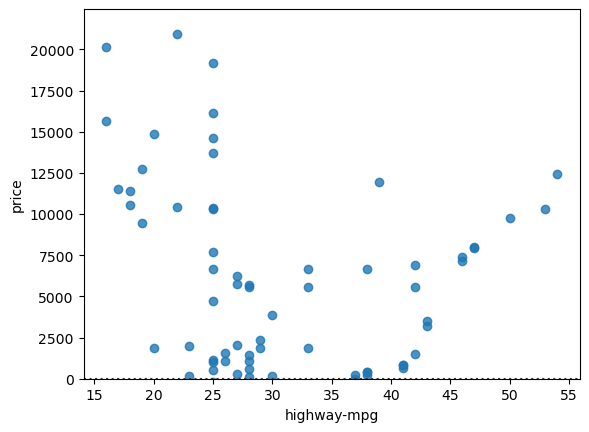

In [75]:
sns.residplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Text(0, 0.5, 'Proportion of Cars')

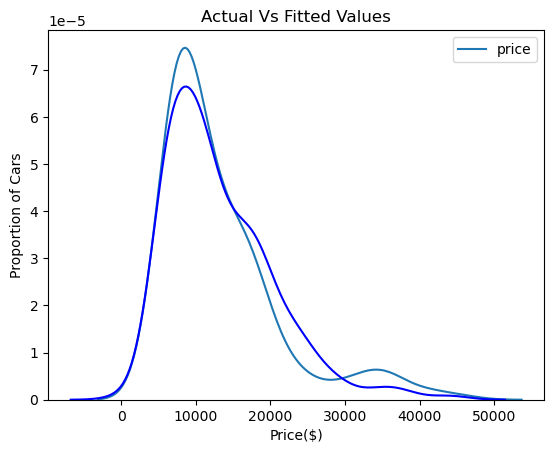

In [76]:
ax1 = sns.kdeplot(df[['price']],color ="r",label= 'Actual Values')
sns.kdeplot(price2,color= "b",label= 'Fitted Values',ax=ax1)
plt.title('Actual Vs Fitted Values')
plt.xlabel('Price($)')
plt.ylabel('Proportion of Cars')

In [77]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
x = df['highway-mpg']
y = df['price']

In [78]:
f = np.polyfit(x,y,3)

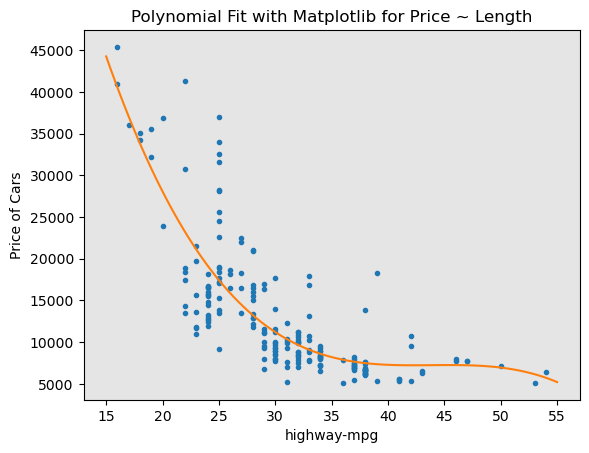

In [79]:
p = np.poly1d(f)
PlotPolly(p,x,y,'highway-mpg')

In [80]:
f1 = np.polyfit(x,y,11)

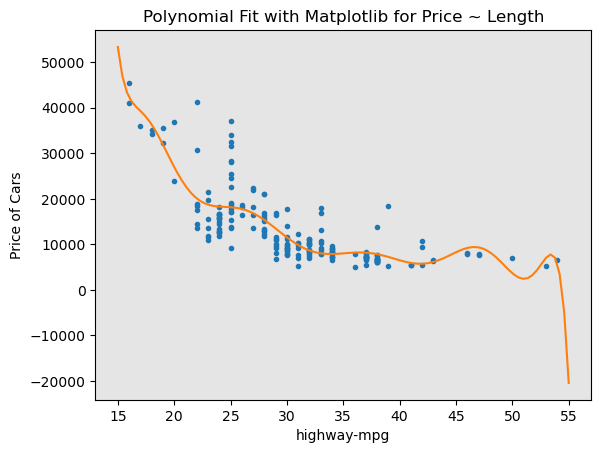

In [81]:
p1 = np.poly1d(f1)
PlotPolly(p1,x,y,'highway-mpg')

In [82]:
x_range = np.linspace(x.min(), x.max(), 100)
y_poly = p(x_range)


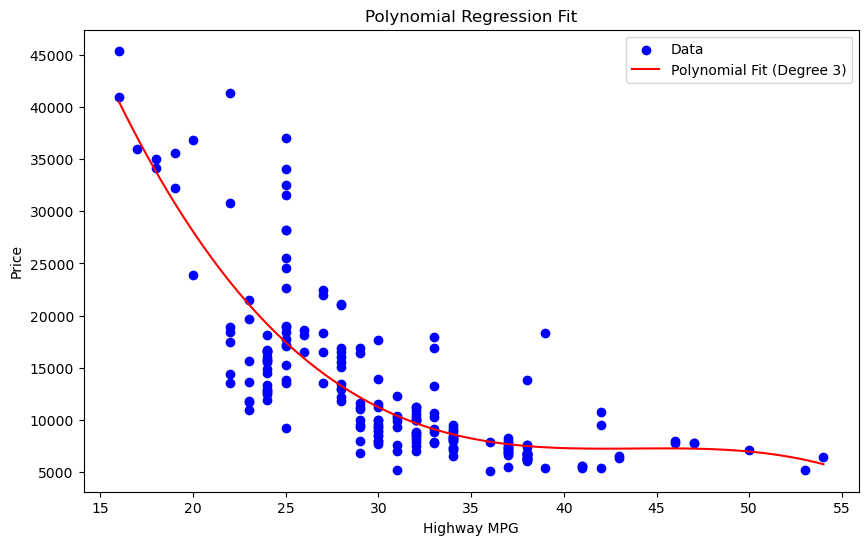

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_range, y_poly, color='red', label='Polynomial Fit (Degree 3)')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

In [178]:
pr = PolynomialFeatures(degree=2)

In [180]:
Z_pr = pr.fit_transform(Z)

In [182]:
Z.shape

(201, 4)

In [184]:
Z_pr.shape

(201, 15)

In [186]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [190]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [192]:
Z= Z.astype('float')
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [194]:
ypipe=pipe.predict(Z)
ypipe[0:5]



array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [198]:
Input2=[('scale',StandardScaler()),('model',LinearRegression())]

In [200]:
pipe2 = Pipeline(Input2)

In [202]:
pipe2.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [206]:
ypipe2=pipe2.predict(Z)
ypipe2[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [210]:
from sklearn.metrics import mean_squared_error

In [212]:
lm.fit(X,Y)

LinearRegression()

In [214]:
lm.score(X,Y)
print('The R-square is :',lm.score(X,Y))

The R-square is : 0.4965911884339175


In [216]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [220]:
mse = mean_squared_error(df['price'],yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11980396.30094228


In [232]:
lm.fit(Z,df['price'])
print('The R-square is:',lm.score(Z,df['price']))

The R-square is: 0.8093562806577457


In [236]:
Y_predict_mf = lm.predict(Z)
print('The Mean Sqaure Error is:',\
      mean_squared_error(Y_predict_mf,df['price']))

The Mean Sqaure Error is: 11980366.870726496


In [246]:
r2_value = r2_score(p(x),y)
print('R-square value is:',r2_value)

R-square value is: 0.5167488711330679


In [252]:
mse2 = mean_squared_error(p(x),df['price'])
print('The Mean Squared Error is:',mse2)

The Mean Squared Error is: 20474146.426361237


In [262]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [264]:
lm.fit(X,Y)
lm

LinearRegression()

In [269]:
yhat3=lm.predict(new_input)
yhat3[0:5]

C:\Users\amanm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

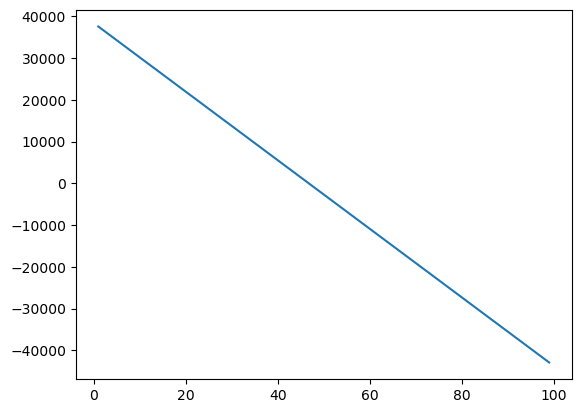

In [273]:
plt.plot(new_input, yhat3)
plt.show()